In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Basic plot templates
Here do the "basic matplotlib style", but for the "object-oriented" style see [this article](https://towardsdatascience.com/an-introduction-to-making-scientific-publication-plots-with-python-ea19dfa7f51e)

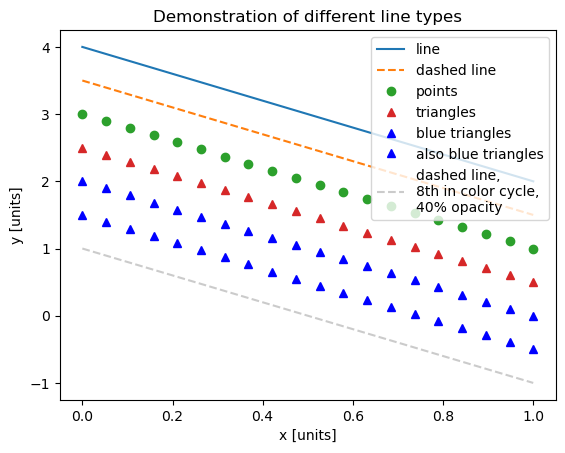

In [3]:
xdata = np.linspace(0,1,20)
ydata = -2*xdata

fig = plt.figure()

# You would likely only need one or two of these "plt.plot" calls
plt.plot(xdata, ydata + 4, label="line")
plt.plot(xdata, ydata + 3.5, "--", label="dashed line")
plt.plot(xdata, ydata + 3, "o", label="points")
plt.plot(xdata, ydata + 2.5, "^", label="triangles")
plt.plot(xdata, ydata + 2, "b^", label="blue triangles") # Full lists of colors can be found here: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.plot(xdata, ydata + 1.5, "^", color="blue", label="also blue triangles") # there are many ways to do most things in pyplot
plt.plot(xdata, ydata + 1.0, "--", color="C7", alpha=0.4, label="dashed line,\n8th in color cycle,\n40% opacity")


plt.title("Demonstration of different line types") # recall that the usage of this field is field-specific
plt.xlabel("x [units]") # replace units with whatever is appropriate for your problem
plt.ylabel("y [units]")
plt.legend()
#plt.grid(which='major', alpha=0.7)   # if you want a grid. See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html


# for more line styles and manual color-setting options see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

# to save a figure
# plt.savefig("filename.pdf or .jpg or .png")


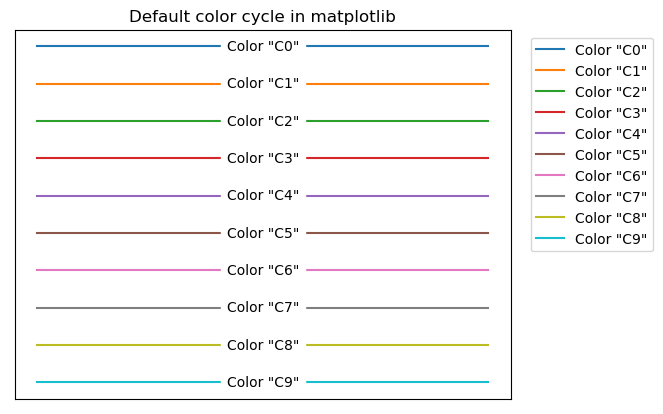

In [4]:
# View your color cycle
for i in range(10):
    plt.plot(xdata, np.zeros_like(xdata) - i , label="Color \"C" + str(i) + "\"")
    
    # assign the annotation object to a variable so we can change its properties later
    t = plt.annotate("Color \"C" + str(i) + "\"", xycoords="data", xy=(0.5,-i), ha='center', va='center') 
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='white')) # put whitespace behind the annotations so theyre legible

plt.yticks([])
plt.xticks([])
plt.title("Default color cycle in matplotlib")

# For advanced legend box placing, see below link
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
plt.legend(loc=(1.04, 0.4))

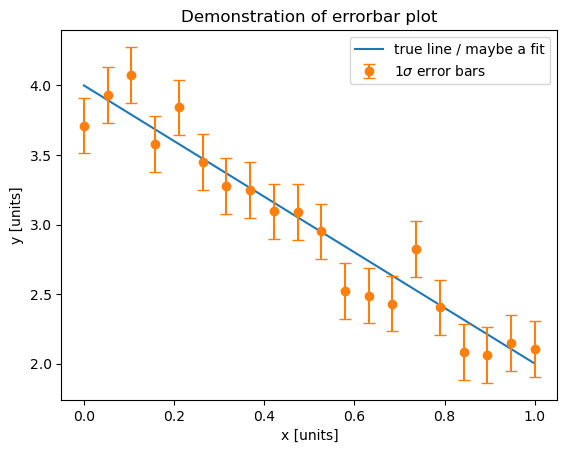

In [5]:
# error bars
error = np.random.normal(0.0,0.2,len(ydata))

plt.plot(xdata, ydata + 4, label="true line / maybe a fit")
plt.errorbar(xdata, ydata + 4 + error, yerr=0.2, fmt="o", capsize=4, label=r"$1\sigma$ error bars")

plt.title("Demonstration of errorbar plot")
plt.xlabel("x [units]") # replace units with whatever is appropriate for your problem
plt.ylabel("y [units]")
plt.legend()


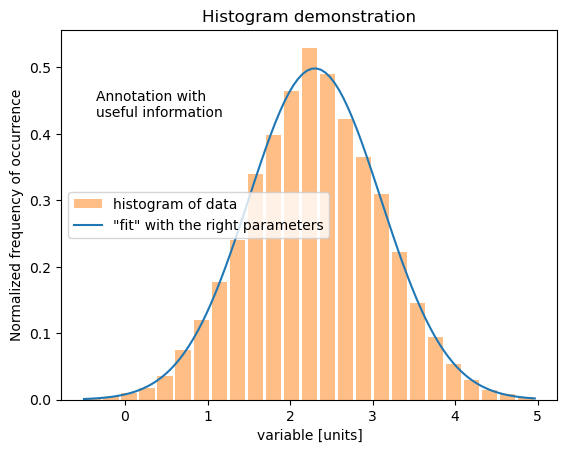

In [6]:
random_data=np.random.normal(2.3,0.8,10000)

plt.xlabel("variable [units]")
plt.ylabel("Normalized frequency of occurrence")
plt.title("Histogram demonstration")

plt.hist(random_data, 25, density=True, alpha=0.5, color='C1', rwidth=0.85, label="histogram of data") # "density=True" normalizes the histogram to have area 1
# see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html for more details


# plot a Gaussian over it
import scipy.stats as stats # for plotting a normal distribution PDF

x = np.linspace(min(random_data), max(random_data), 100)

plt.plot(x, stats.norm.pdf(x, 2.3, 0.8), label="\"fit\" with the right parameters")

# For annotation documentation see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
plt.annotate("Annotation with\nuseful information", xycoords = "figure fraction", xy=(0.15,0.7))

plt.legend()

# Demonstration of rescaling and transforming axes 
(used in presentation)

See https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html for info on making multiple subplots within a plot

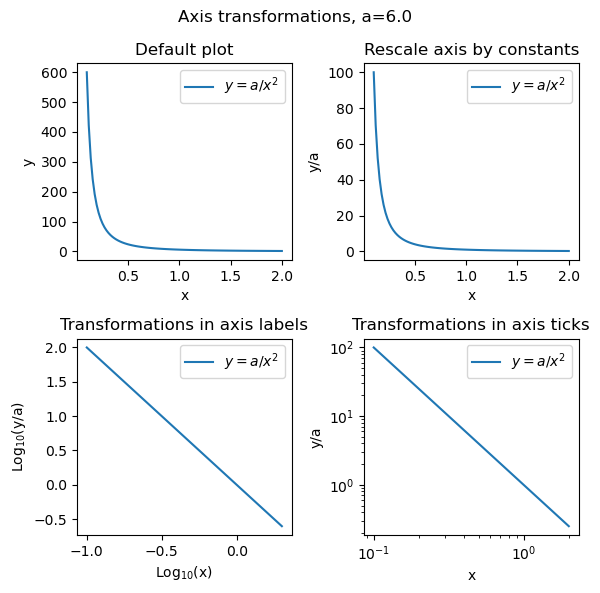

In [22]:
def f(x,a):
    return a*np.power(x,-2)

a = 6.0
x_arr = np.linspace(0.1,2,100)
y_arr = f(x_arr, a=a)


fig, axs = plt.subplots(2, 2, figsize=(6, 6)) 
fig.suptitle(f"Axis transformations, a={a}")

# Default plot
axs[0,0].set(xlabel = "x", ylabel = "y", title="Default plot")
axs[0,0].plot(x_arr,y_arr, label=r"$y = a/x^2$")

# Rescale axis by constants
axs[0,1].set(xlabel = "x", ylabel = "y/a", title = "Rescale axis by constants")
axs[0,1].plot(x_arr,y_arr/a, label=r"$y = a/x^2$")

# Apply transformation to arrays and put it in the axis labels
axs[1,0].set(xlabel = r"Log$_{10}$(x)", ylabel = r"Log$_{10}$(y/a)", title = "Transformations in axis labels")
axs[1,0].plot(np.log10(x_arr),np.log10(y_arr/a), label=r"$y = a/x^2$")

# Make use of code to rescale the numbers on the axes themselves
axs[1,1].set(xlabel = "x", ylabel = "y/a", xscale = "log", yscale = "log", title = "Transformations in axis ticks")
axs[1,1].plot(x_arr,y_arr/a, label=r"$y = a/x^2$")

for ax in axs.flat:
    ax.legend()

fig.tight_layout()


# A Pointless Transformation

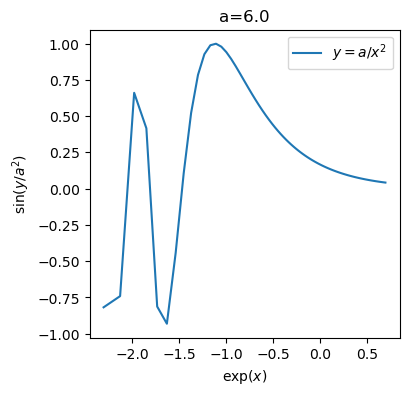

In [29]:
plt.figure(figsize=(4,4))
plt.plot(np.log(x_arr),np.sin(y_arr/a**2), label=r"$y = a/x^2$")
plt.xlabel(r"$\exp(x)$")
plt.ylabel(r"$\sin(y/a^2)$")
plt.title(f"a={a}")
plt.legend()